<img src='https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQ-VfNtOyJbsaxu43Kztf_cv1mgBG6ZIQZEVw&usqp=CAU'>

# Procesamiento de Lenguage Natural

## PROYECTO FINAL ANÁLISIS DE SENTIMIENTOS FNA

### PROBLEMA
En la actualidad el área de comunicaciones realiza la clasificación de cada uno de los comentarios de forma manual
a través de un excel, lo cual conlleva a demoras en la entrega de informes y seguimiento de indicadores.

### OBJETIVO
Analizar los sentimientos de los tweets relacionados con la entidad Fondo Nacional del Ahorro.


### EXTRACCIÓN DE LA DATA
Mediante API de de twitter


### Limpieza

1. Quitar caracteres especiales
2. Quitamos stopwords



In [27]:
##pip install tweepy
import tweepy
import pandas as pd
from nltk.corpus import stopwords
stopwords = stopwords.words('spanish')
!pip install TextBlob 
from textblob import TextBlob
import re
import time
from pprint import pprint
import json
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from nltk.corpus import stopwords
stopwords = stopwords.words('spanish')
!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
!pip install googletrans
import googletrans
from googletrans import Translator
!pip install flair
from flair.models import TextClassifier
from flair.data import Sentence
!pip install flair
!pip install TextClassifier
from flair.models import TextClassifier
from flair.data import Sentence

    ERROR: Command errored out with exit status 1:
     command: 'C:\Users\andre\Anaconda3\python.exe' -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\andre\\AppData\\Local\\Temp\\pip-install-b2htm80y\\textclassifier\\setup.py'"'"'; __file__='"'"'C:\\Users\\andre\\AppData\\Local\\Temp\\pip-install-b2htm80y\\textclassifier\\setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' egg_info --egg-base 'C:\Users\andre\AppData\Local\Temp\pip-pip-egg-info-1hrgqr7_'
         cwd: C:\Users\andre\AppData\Local\Temp\pip-install-b2htm80y\textclassifier\
    Complete output (5 lines):
    Traceback (most recent call last):
      File "<string>", line 1, in <module>
      File "C:\Users\andre\Anaconda3\lib\codecs.py", line 322, in decode
        (result, consumed) = self._buffer_decode(data, self.errors, final)
    UnicodeDecodeError: 'utf-8' codec can't decode b

  Using cached TextClassifier-0.0.8.tar.gz (4.7 kB)


In [10]:
# Leer las llaves
keys = pd.read_csv("mis_llaves2.csv", header=None)
keys = dict(zip(keys[0],keys[1]))
keys.keys()


dict_keys(['api_key', 'api_secret_key', 'access_token', 'access_token_secret', 'bearer_token'])

In [11]:
auth = tweepy.OAuthHandler(keys['api_key'], keys['api_secret_key'])
auth.set_access_token(keys['access_token'], keys['access_token_secret'])
api = tweepy.API(auth, wait_on_rate_limit=True)

In [12]:
tweets = tweepy.Cursor(api.search,
                       q=['Fondo nacional del ahorro -RT'],
                       lang='es',
                       geocode='4.7110,-74.0721,100km',
                       tweet_mode='extended',
                       include_rts=False,
                       ).items(100)

In [13]:
tweets

In [15]:
t = []
for tweet in tweets:
    temp = []
    temp.append(tweet.full_text)
    temp.append(tweet.created_at)
    temp.append("Bogota")
    temp.append(tweet.user.location)
    temp.append(tweet.id)
    temp.append(f"https://twitter.com/i/web/status/{tweet.id}")
    t.append(temp)

In [16]:
data = pd.DataFrame(t)
data.columns = ['tweet', 'date', 'city', 'user_location', 'id', 'link']
data

,tweet,date,city,user_location,id,link
0,@moneytorxbox @LaAmbivalentte @JoMalagon @Ivan...,2021-06-10 15:22:55,Bogota,"Bogotá, D.C. - Colombia",1403009789660123139,https://twitter.com/i/web/status/1403009789660...
1,@LaMega Yo conocí a @CaroCarreta hace un año ...,2021-06-10 12:14:35,Bogota,BOGOTA D.C.,1402962396570923012,https://twitter.com/i/web/status/1402962396570...
2,@LaAmbivalentte @JoMalagon @IvanDuque @infopre...,2021-06-09 14:25:09,Bogota,"Bogotá, D.C. - Colombia",1402632863846223872,https://twitter.com/i/web/status/1402632863846...
3,@LaAmbivalentte @JoMalagon @carlosruizma @info...,2021-06-09 14:16:46,Bogota,"Bogotá, D.C. - Colombia",1402630756242018304,https://twitter.com/i/web/status/1402630756242...
4,#Nacional👉El Fondo Nacional del Ahorro obtuvo ...,2021-06-08 16:00:00,Bogota,"Ibagué, Colombia",1402294346578231297,https://twitter.com/i/web/status/1402294346578...
5,¿Ya leyeron el proyecto de ley PL 413/21? Sobr...,2021-06-07 14:57:49,Bogota,"Bogotá, D.C., Colombia",1401916310775373824,https://twitter.com/i/web/status/1401916310775...
6,"Una vez más, la calificadora de riesgos BRC St...",2021-06-05 00:16:34,Bogota,"Bogotá, Colombia",1400969760695848961,https://twitter.com/i/web/status/1400969760695...
7,"#UnPaísMásConectado | ""Estoy pagando un aparta...",2021-06-03 21:13:00,Bogota,"Bogotá, Colombia",1400561176170287106,https://twitter.com/i/web/status/1400561176170...
8,@CLAO2420 @FNAahorro 2/2 del 90% es el Fondo N...,2021-06-03 17:20:01,Bogota,"Bogotá, D.C. - Colombia",1400502545852796933,https://twitter.com/i/web/status/1400502545852...
9,@ogcoss @JoMalagon 2/2 es el Fondo Nacional de...,2021-06-03 16:13:13,Bogota,"Bogotá, D.C. - Colombia",1400485734360944654,https://twitter.com/i/web/status/1400485734360...


In [17]:
data = data[['tweet','date','city']]
data.head()

,tweet,date,city
0,@moneytorxbox @LaAmbivalentte @JoMalagon @Ivan...,2021-06-10 15:22:55,Bogota
1,@LaMega Yo conocí a @CaroCarreta hace un año ...,2021-06-10 12:14:35,Bogota
2,@LaAmbivalentte @JoMalagon @IvanDuque @infopre...,2021-06-09 14:25:09,Bogota
3,@LaAmbivalentte @JoMalagon @carlosruizma @info...,2021-06-09 14:16:46,Bogota
4,#Nacional👉El Fondo Nacional del Ahorro obtuvo ...,2021-06-08 16:00:00,Bogota


In [22]:
def pre_procesado(texto):
    texto = texto.lower()
    texto = re.sub(r"[\W\d_]+", " ", texto)
    texto = [palabra for palabra in texto.split() if palabra not in stopwords]
    return texto

In [26]:
data['tweet_p'] = data['tweet'].apply(lambda texto: pre_procesado(texto))

data.head()

,tweet,date,city,clean,links,hashtags,mentions,fecha,tweet_p
0,@moneytorxbox @LaAmbivalentte @JoMalagon @Ivan...,2021-06-10 15:22:55,Bogota,para poder aplicar te puedes acercar a...,[https://t.co/HQZslsQpay],[],"[@moneytorxbox, @LaAmbivalentte, @JoMalagon, @...",2021-06-10,"[moneytorxbox, laambivalentte, jomalagon, ivan..."
1,@LaMega Yo conocí a @CaroCarreta hace un año ...,2021-06-10 12:14:35,Bogota,Yo conocí a hace un año saliendo del fondo ...,[],[#MiRicoMañanero],"[@LaMega, @CaroCarreta]",2021-06-10,"[lamega, conocí, carocarreta, hace, año, salie..."
2,@LaAmbivalentte @JoMalagon @IvanDuque @infopre...,2021-06-09 14:25:09,Bogota,te debes acercar a las oficinas del Fon...,[https://t.co/HQZslsQpay],[],"[@LaAmbivalentte, @JoMalagon, @IvanDuque, @inf...",2021-06-09,"[laambivalentte, jomalagon, ivanduque, infopre..."
3,@LaAmbivalentte @JoMalagon @carlosruizma @info...,2021-06-09 14:16:46,Bogota,para poder aplicar te puedes acercar a ...,[https://t.co/HQZslsQpay],[],"[@LaAmbivalentte, @JoMalagon, @carlosruizma, @...",2021-06-09,"[laambivalentte, jomalagon, carlosruizma, info..."
4,#Nacional👉El Fondo Nacional del Ahorro obtuvo ...,2021-06-08 16:00:00,Bogota,Fondo Nacional del Ahorro obtuvo la valoració...,"[https://t.co/BoKofbOBgq, https://t.co/rdi0YxB...",[#Nacional👉El],"[@FNAahorro, @SPGRatingsLatAm, @FNApresidente]",2021-06-08,"[nacional, fondo, nacional, ahorro, obtuvo, va..."


In [29]:
data.tweet_p.iloc[1]

['lamega',
 'conocí',
 'carocarreta',
 'hace',
 'año',
 'saliendo',
 'fondo',
 'nacional',
 'ahorro',
 'tomamos',
 'cerveza',
 'oxxo',
 'jajaja',
 'amo',
 'carreta',
 'miricomañanero']

In [30]:
data.tweet.iloc[1]

'@LaMega Yo conocí a @CaroCarreta  hace un año saliendo del fondo nacional del ahorro... Tomamos una cerveza en el oxxo jajaja te amo  Carreta... #MiRicoMañanero'

###  `[25 pts]` Punto 2: Hacer una visualización sobre esos tuits

In [31]:
import re
 
pattern1 = '?P<pic>pic.twitter.com/[^\s]+'
pattern2 = '?P<url>https?://[^\s]+'
def text_clean(row):
    text = row['tweet']
    
    links = [tuple(j for j in i if j)[-1] for i in re.findall(f"({pattern1})|({pattern2})",text)]
    for link in links:
        text = text.replace(link,"")
    hashtags = [interaction for interaction in text.split() if interaction.startswith("#")]
    
    for hashtag in hashtags:
        text = text.replace(hashtag,"")
    mentions = [interaction for interaction in text.split() if interaction.startswith("@")]
    
    for mention in mentions:
        text = text.replace(mention,"")
    return text, links, hashtags, mentions

In [32]:
data[['clean', 'links', 'hashtags', 'mentions']] = data.apply(text_clean, axis=1, result_type='expand')
data.head()

,tweet,date,city,clean,links,hashtags,mentions,fecha,tweet_p
0,@moneytorxbox @LaAmbivalentte @JoMalagon @Ivan...,2021-06-10 15:22:55,Bogota,para poder aplicar te puedes acercar a...,[https://t.co/HQZslsQpay],[],"[@moneytorxbox, @LaAmbivalentte, @JoMalagon, @...",2021-06-10,"[moneytorxbox, laambivalentte, jomalagon, ivan..."
1,@LaMega Yo conocí a @CaroCarreta hace un año ...,2021-06-10 12:14:35,Bogota,Yo conocí a hace un año saliendo del fondo ...,[],[#MiRicoMañanero],"[@LaMega, @CaroCarreta]",2021-06-10,"[lamega, conocí, carocarreta, hace, año, salie..."
2,@LaAmbivalentte @JoMalagon @IvanDuque @infopre...,2021-06-09 14:25:09,Bogota,te debes acercar a las oficinas del Fon...,[https://t.co/HQZslsQpay],[],"[@LaAmbivalentte, @JoMalagon, @IvanDuque, @inf...",2021-06-09,"[laambivalentte, jomalagon, ivanduque, infopre..."
3,@LaAmbivalentte @JoMalagon @carlosruizma @info...,2021-06-09 14:16:46,Bogota,para poder aplicar te puedes acercar a ...,[https://t.co/HQZslsQpay],[],"[@LaAmbivalentte, @JoMalagon, @carlosruizma, @...",2021-06-09,"[laambivalentte, jomalagon, carlosruizma, info..."
4,#Nacional👉El Fondo Nacional del Ahorro obtuvo ...,2021-06-08 16:00:00,Bogota,Fondo Nacional del Ahorro obtuvo la valoració...,"[https://t.co/BoKofbOBgq, https://t.co/rdi0YxB...",[#Nacional👉El],"[@FNAahorro, @SPGRatingsLatAm, @FNApresidente]",2021-06-08,"[nacional, fondo, nacional, ahorro, obtuvo, va..."


In [33]:
import plotly.io as pio
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import matplotlib.pyplot as plt
%matplotlib inline
init_notebook_mode(connected=True)

In [34]:
data['fecha'] = data.date.dt.date
temp = pd.DataFrame(data.fecha.value_counts()).reset_index()
temp.columns = ['fecha', 'cnt']
temp = temp.sort_values('fecha')
temp

,fecha,cnt
0,2021-06-03,5
3,2021-06-05,1
5,2021-06-07,1
4,2021-06-08,1
1,2021-06-09,2
2,2021-06-10,2


In [13]:
trace = go.Scatter(x=temp.fecha.values,
                   y=temp.cnt.values,
                   text=[f"Fecha: {f}<br>Tuits: {c}" for f,c in zip(temp.fecha.values,temp.cnt.values)],
                   hoverinfo='text',
                   mode='lines+markers',
                   name='Días',
                   line={'color':'#1DA1F2'})
layout = go.Layout(title='Número de tuits por día')
fig = go.Figure(data=[trace], layout=layout)
iplot(fig)

In [35]:
import numpy as np

from wordcloud import WordCloud
from wordcloud import ImageColorGenerator

from nltk.corpus import stopwords
stopwords = stopwords.words('spanish')

import matplotlib.pyplot as plt
import PIL.Image
from IPython.display import display

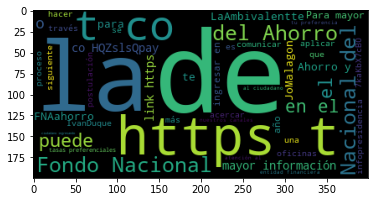

In [37]:
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator

import matplotlib.pyplot as plt
import PIL.Image
from IPython.display import display

palabras = data.tweet.str.cat(sep=" ")
wordcloud = WordCloud().generate(palabras)

plt.imshow(wordcloud)
plt.show()

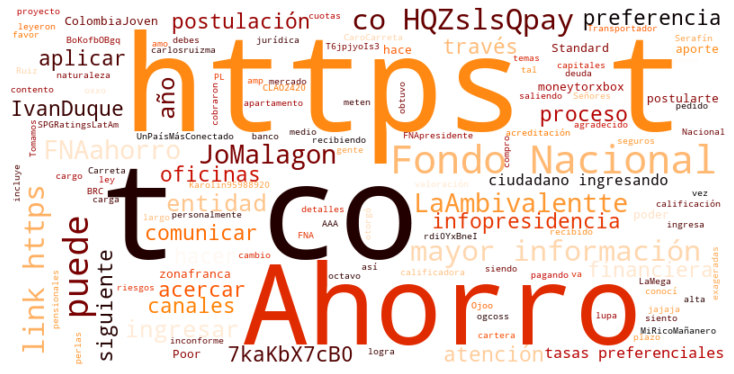

In [39]:
palabras = data.tweet.str.cat(sep=' ')

wordcloud = WordCloud(width=800, height=400, # Ajustamos el tamaño
                     max_font_size=150, max_words=250,
                     background_color='white', colormap='gist_heat',
                     stopwords=stopwords).generate(palabras) # https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html

plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off") #apaga el eje para que no se visualice
plt.tight_layout(pad=0)
plt.show()

In [44]:
def sentimiento(valor):
    if valor > 0:
        senti = 'POSITIVE'
        #return senti
    if valor < 0:
        senti = 'NEGATIVE' 
        #return senti
    if valor == 0:
        senti = 'POSITIVE' 
    return senti

In [45]:
#Se crea una nueva columna para generar el porcentaje del sentimiento de los comentarios de algunas tuit con la librería TextBlob
data['sent_textblob'] = data['clean'].apply(lambda valor: TextBlob(valor).sentiment.polarity)
data.head()

,tweet,date,city,clean,links,hashtags,mentions,fecha,tweet_p,sent_textblob
0,@moneytorxbox @LaAmbivalentte @JoMalagon @Ivan...,2021-06-10 15:22:55,Bogota,para poder aplicar te puedes acercar a...,[https://t.co/HQZslsQpay],[],"[@moneytorxbox, @LaAmbivalentte, @JoMalagon, @...",2021-06-10,"[moneytorxbox, laambivalentte, jomalagon, ivan...",0.0
1,@LaMega Yo conocí a @CaroCarreta hace un año ...,2021-06-10 12:14:35,Bogota,Yo conocí a hace un año saliendo del fondo ...,[],[#MiRicoMañanero],"[@LaMega, @CaroCarreta]",2021-06-10,"[lamega, conocí, carocarreta, hace, año, salie...",0.0
2,@LaAmbivalentte @JoMalagon @IvanDuque @infopre...,2021-06-09 14:25:09,Bogota,te debes acercar a las oficinas del Fon...,[https://t.co/HQZslsQpay],[],"[@LaAmbivalentte, @JoMalagon, @IvanDuque, @inf...",2021-06-09,"[laambivalentte, jomalagon, ivanduque, infopre...",0.0
3,@LaAmbivalentte @JoMalagon @carlosruizma @info...,2021-06-09 14:16:46,Bogota,para poder aplicar te puedes acercar a ...,[https://t.co/HQZslsQpay],[],"[@LaAmbivalentte, @JoMalagon, @carlosruizma, @...",2021-06-09,"[laambivalentte, jomalagon, carlosruizma, info...",0.0
4,#Nacional👉El Fondo Nacional del Ahorro obtuvo ...,2021-06-08 16:00:00,Bogota,Fondo Nacional del Ahorro obtuvo la valoració...,"[https://t.co/BoKofbOBgq, https://t.co/rdi0YxB...",[#Nacional👉El],"[@FNAahorro, @SPGRatingsLatAm, @FNApresidente]",2021-06-08,"[nacional, fondo, nacional, ahorro, obtuvo, va...",-0.2


In [46]:
#Se crea una nueva columna para colocar la descripción de que si el porcentaje es mayor o igual a cero es positivo y si
# el porcentaje es menor a cero es negativo
data['descrip_sent_textblob'] = data['sent_textblob'].apply(lambda valor: sentimiento(valor))
data

,tweet,date,city,clean,links,hashtags,mentions,fecha,tweet_p,sent_textblob,descrip_sent_textblob
0,@moneytorxbox @LaAmbivalentte @JoMalagon @Ivan...,2021-06-10 15:22:55,Bogota,para poder aplicar te puedes acercar a...,[https://t.co/HQZslsQpay],[],"[@moneytorxbox, @LaAmbivalentte, @JoMalagon, @...",2021-06-10,"[moneytorxbox, laambivalentte, jomalagon, ivan...",0.00,POSITIVE
1,@LaMega Yo conocí a @CaroCarreta hace un año ...,2021-06-10 12:14:35,Bogota,Yo conocí a hace un año saliendo del fondo ...,[],[#MiRicoMañanero],"[@LaMega, @CaroCarreta]",2021-06-10,"[lamega, conocí, carocarreta, hace, año, salie...",0.00,POSITIVE
2,@LaAmbivalentte @JoMalagon @IvanDuque @infopre...,2021-06-09 14:25:09,Bogota,te debes acercar a las oficinas del Fon...,[https://t.co/HQZslsQpay],[],"[@LaAmbivalentte, @JoMalagon, @IvanDuque, @inf...",2021-06-09,"[laambivalentte, jomalagon, ivanduque, infopre...",0.00,POSITIVE
3,@LaAmbivalentte @JoMalagon @carlosruizma @info...,2021-06-09 14:16:46,Bogota,para poder aplicar te puedes acercar a ...,[https://t.co/HQZslsQpay],[],"[@LaAmbivalentte, @JoMalagon, @carlosruizma, @...",2021-06-09,"[laambivalentte, jomalagon, carlosruizma, info...",0.00,POSITIVE
4,#Nacional👉El Fondo Nacional del Ahorro obtuvo ...,2021-06-08 16:00:00,Bogota,Fondo Nacional del Ahorro obtuvo la valoració...,"[https://t.co/BoKofbOBgq, https://t.co/rdi0YxB...",[#Nacional👉El],"[@FNAahorro, @SPGRatingsLatAm, @FNApresidente]",2021-06-08,"[nacional, fondo, nacional, ahorro, obtuvo, va...",-0.20,NEGATIVE
5,¿Ya leyeron el proyecto de ley PL 413/21? Sobr...,2021-06-07 14:57:49,Bogota,¿Ya leyeron el proyecto de ley PL 413/21? Sobr...,[],[],[],2021-06-07,"[leyeron, proyecto, ley, pl, mercado, capitale...",0.00,POSITIVE
6,"Una vez más, la calificadora de riesgos BRC St...",2021-06-05 00:16:34,Bogota,"Una vez más, la calificadora de riesgos BRC St...",[https://t.co/32ijrHiIA7],[],[],2021-06-05,"[vez, calificadora, riesgos, brc, standard, am...",-0.20,NEGATIVE
7,"#UnPaísMásConectado | ""Estoy pagando un aparta...",2021-06-03 21:13:00,Bogota,"| ""Estoy pagando un apartamento por medio del...",[https://t.co/T6jpjyoIs3],[#UnPaísMásConectado],[],2021-06-03,"[unpaísmásconectado, pagando, apartamento, med...",0.00,POSITIVE
8,@CLAO2420 @FNAahorro 2/2 del 90% es el Fondo N...,2021-06-03 17:20:01,Bogota,2/2 del 90% es el Fondo Nacional del Ahorro....,"[https://t.co/HQZslsQpay, https://t.co/7kaKbX7...",[],"[@CLAO2420, @FNAahorro]",2021-06-03,"[clao, fnaahorro, fondo, nacional, ahorro, may...",0.05,POSITIVE
9,@ogcoss @JoMalagon 2/2 es el Fondo Nacional de...,2021-06-03 16:13:13,Bogota,2/2 es el Fondo Nacional del Ahorro. Para m...,"[https://t.co/HQZslsQpay, https://t.co/7kaKbX7...",[],"[@ogcoss, @JoMalagon]",2021-06-03,"[ogcoss, jomalagon, fondo, nacional, ahorro, m...",0.05,POSITIVE


In [47]:
#Se ordena los datos por el porcentaje de mayor a menor
data[['clean', 'sent_textblob']].sort_values('sent_textblob',ascending=False)

,clean,sent_textblob
8,2/2 del 90% es el Fondo Nacional del Ahorro....,0.05
9,2/2 es el Fondo Nacional del Ahorro. Para m...,0.05
10,2/2 del 90% es el Fondo Nacional del Ahorro....,0.05
0,para poder aplicar te puedes acercar a...,0.00
1,Yo conocí a hace un año saliendo del fondo ...,0.00
2,te debes acercar a las oficinas del Fon...,0.00
3,para poder aplicar te puedes acercar a ...,0.00
5,¿Ya leyeron el proyecto de ley PL 413/21? Sobr...,0.00
7,"| ""Estoy pagando un apartamento por medio del...",0.00
11,Señores en el fondo nacional del ahorro tambi...,0.00


In [48]:
#Se ordena los datos por el porcentaje de menor a mayor
data[['clean', 'sent_textblob']].sort_values('sent_textblob',ascending=True)

,clean,sent_textblob
4,Fondo Nacional del Ahorro obtuvo la valoració...,-0.20
6,"Una vez más, la calificadora de riesgos BRC St...",-0.20
0,para poder aplicar te puedes acercar a...,0.00
1,Yo conocí a hace un año saliendo del fondo ...,0.00
2,te debes acercar a las oficinas del Fon...,0.00
3,para poder aplicar te puedes acercar a ...,0.00
5,¿Ya leyeron el proyecto de ley PL 413/21? Sobr...,0.00
7,"| ""Estoy pagando un apartamento por medio del...",0.00
11,Señores en el fondo nacional del ahorro tambi...,0.00
8,2/2 del 90% es el Fondo Nacional del Ahorro....,0.05


In [49]:
#Se coloca la cantidad y el porcentaje de tuit por opiniones negativas y positivas
cant_tweet = pd.DataFrame(data.descrip_sent_textblob.value_counts()).reset_index()
cant_tweet.columns = ['descrip_textblob', 'cant']
cant_tweet1 = pd.DataFrame(round((data.descrip_sent_textblob.value_counts(normalize=True)),2)).reset_index()
cant_tweet1.columns = ['descrip_textblob', 'porcentaje']
cant_tweet2 = pd.merge(cant_tweet, cant_tweet1, on='descrip_textblob')
cant_tweet2 = cant_tweet2.sort_values('cant')
cant_tweet2



,descrip_textblob,cant,porcentaje
1,NEGATIVE,2,0.17
0,POSITIVE,10,0.83


In [50]:
#Se grafica la cantidad de tuit por opiniones negativas y positivas que se generaron con la librería textblob
datos_grafi = go.Bar(x=cant_tweet2.descrip_textblob.values[:10],
                     y=cant_tweet2.cant.values[:10])

grafica = go.Layout(title='Opiniones Positivas y Negativas con Textblob')

figura = go.Figure(data=[datos_grafi], layout=grafica)
iplot(figura)

In [52]:
import regex
import emoji

def get_emojis(text):
    emoji_list = []
    data = regex.findall(r'\X', text)
    for word in data:
        if any(char in emoji.UNICODE_EMOJI for char in word):
            emoji_list.append(word)

    return emoji_list

data['emojis'] = data['clean'].apply(lambda text: get_emojis(text))

In [53]:
data.head()

,tweet,date,city,clean,links,hashtags,mentions,fecha,tweet_p,sent_textblob,descrip_sent_textblob,emojis
0,@moneytorxbox @LaAmbivalentte @JoMalagon @Ivan...,2021-06-10 15:22:55,Bogota,para poder aplicar te puedes acercar a...,[https://t.co/HQZslsQpay],[],"[@moneytorxbox, @LaAmbivalentte, @JoMalagon, @...",2021-06-10,"[moneytorxbox, laambivalentte, jomalagon, ivan...",0.0,POSITIVE,[]
1,@LaMega Yo conocí a @CaroCarreta hace un año ...,2021-06-10 12:14:35,Bogota,Yo conocí a hace un año saliendo del fondo ...,[],[#MiRicoMañanero],"[@LaMega, @CaroCarreta]",2021-06-10,"[lamega, conocí, carocarreta, hace, año, salie...",0.0,POSITIVE,[]
2,@LaAmbivalentte @JoMalagon @IvanDuque @infopre...,2021-06-09 14:25:09,Bogota,te debes acercar a las oficinas del Fon...,[https://t.co/HQZslsQpay],[],"[@LaAmbivalentte, @JoMalagon, @IvanDuque, @inf...",2021-06-09,"[laambivalentte, jomalagon, ivanduque, infopre...",0.0,POSITIVE,[]
3,@LaAmbivalentte @JoMalagon @carlosruizma @info...,2021-06-09 14:16:46,Bogota,para poder aplicar te puedes acercar a ...,[https://t.co/HQZslsQpay],[],"[@LaAmbivalentte, @JoMalagon, @carlosruizma, @...",2021-06-09,"[laambivalentte, jomalagon, carlosruizma, info...",0.0,POSITIVE,[]
4,#Nacional👉El Fondo Nacional del Ahorro obtuvo ...,2021-06-08 16:00:00,Bogota,Fondo Nacional del Ahorro obtuvo la valoració...,"[https://t.co/BoKofbOBgq, https://t.co/rdi0YxB...",[#Nacional👉El],"[@FNAahorro, @SPGRatingsLatAm, @FNApresidente]",2021-06-08,"[nacional, fondo, nacional, ahorro, obtuvo, va...",-0.2,NEGATIVE,[]


In [54]:
data['fecha'] = data.date.dt.date
temp = pd.DataFrame(data.fecha.value_counts()).reset_index()
temp.columns = ['fecha', 'cnt']
temp = temp.sort_values('fecha')
temp

,fecha,cnt
0,2021-06-03,5
3,2021-06-05,1
5,2021-06-07,1
4,2021-06-08,1
1,2021-06-09,2
2,2021-06-10,2


# ¿Cuál es el tuit más positivo y más negativo?

In [59]:
#El más negativo
data[['clean','sent_textblob']].sort_values('sent_textblob').head(1).values

array([[" Fondo Nacional del Ahorro obtuvo la valoración AAA a cargo de Standard y Poor's.\n             \n     \n\nMás detalles.\n ",
        -0.2]], dtype=object)

In [60]:
#El más positivo
data[['clean','sent_textblob']].sort_values('sent_textblob').tail(1).values

array([['  2/2 del 90% es el Fondo Nacional del Ahorro.  Para mayor información puede ingresar en el siguiente link:  o se puede comunicar a través de nuestros canales de atención al ciudadano ingresando en el link: ',
        0.05]], dtype=object)

# ¿Cuántos tuits positivos/negativos hay en los Datos?¶

In [62]:
columnas = ['sent_textblob']

tweetsByMethod = []

for columna in columnas:
    lista = []
    print(f"Método: {columna}")
    print(f"* Cantidad de Tuits Negativos: {len(data[data[columna]<0])}")
    print(f"* Cantidad de Tuits Positivos: {len(data[data[columna]>0])}")
    print(f"* Cantidad de Tuits Neutros: {len(data[data[columna]==0])}")
    lista.append(columna)
    lista.append(len(data[data[columna]<0]))
    lista.append(len(data[data[columna]>0]))
    lista.append(len(data[data[columna]==0]))
    print("##############")
    tweetsByMethod.append(lista)
dfTbM = pd.DataFrame(tweetsByMethod)
dfTbM.columns = ['Método', 'numNegativos', 'numPositivos', 'numNeutros']

Método: sent_textblob
* Cantidad de Tuits Negativos: 2
* Cantidad de Tuits Positivos: 3
* Cantidad de Tuits Neutros: 7
##############


# Nubes de palabras por sentimiento

In [63]:
dataPositiva = data[data['sent_textblob']>0]
dataNegativa = data[data['sent_textblob']<0]
textoPositivo = dataPositiva.clean.str.cat(sep=" ")
textoNegativo = dataNegativa.clean.str.cat(sep=" ")
#

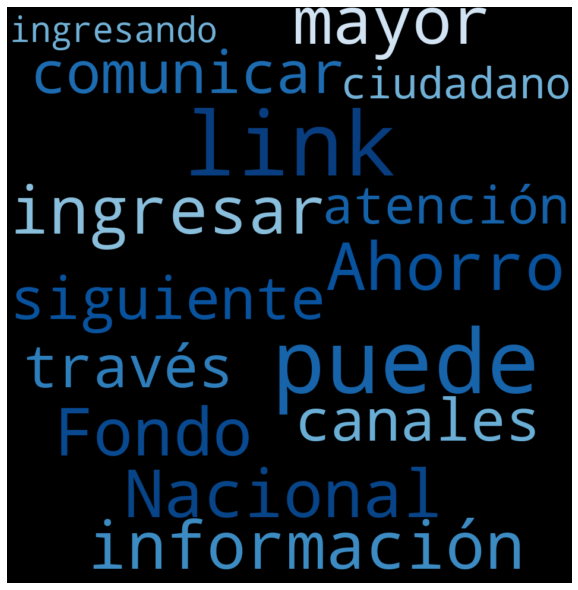

In [64]:
fna = PIL.Image.open("OT#3089 Solicitud Logo editable -02.png")
colMask = np.array(fna)
wordcloud = WordCloud(width=1000, height=500,
                     max_font_size= 150, max_words=400,
                     background_color='black',
                      mask=colMask,
                     colormap='Blues',
                     stopwords=stopwords).generate(textoPositivo)

plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()